['x_train', 'y_train', 'x_test', 'y_test']
(12665, 28, 28)
[0 1 1 ... 1 0 1]


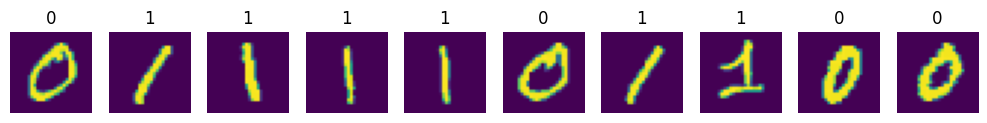

In [1]:
import matplotlib.pyplot as plt
import numpy as np


lib = np.load('mnist_binary_01.npz')
print(lib.files)
X_train_3D = lib['x_train']
Y_train = lib['y_train']

print(X_train_3D.shape)
print(Y_train)
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_train_3D[i])
    plt.title(str(Y_train[i]))
    plt.axis('off')
    plt.tight_layout()
plt.show()

In [2]:
import numpy as np
from deepneuralnetwork2 import DeepNeuralNetwork
# Load data
lib_train = np.load('mnist_binary_01.npz')
X_3D, Y = lib_train['x_train'], lib_train['y_train']

# Reshape and normalize input data
X = X_3D.reshape((X_3D.shape[0], -1))
X = X / 255.0  # Normalize pixel values to [0, 1]

# Ensure Y has proper shape
if Y.ndim == 1:
    Y = Y.reshape(1, -1)


np.random.seed(0)
deep = DeepNeuralNetwork(X.shape[1], [5, 3, 1])
print(deep.cache)
print(deep.weights)
print(deep.L)
print(deep.L)

{}
{'w1': array([[ 0.0890981 ,  0.02021099,  0.04943373, ...,  0.02632982,
         0.03090699, -0.06775582],
       [ 0.02408701,  0.00749784,  0.02672082, ...,  0.00484894,
        -0.00227857,  0.00399625],
       [ 0.04295829, -0.04238217, -0.05110231, ..., -0.00364861,
         0.01571416, -0.05446546],
       [ 0.05361891, -0.05984585, -0.09117898, ..., -0.03094292,
        -0.01925805, -0.06308145],
       [-0.01667953, -0.04216413,  0.06239623, ..., -0.02024521,
        -0.05159656, -0.02373981]], shape=(5, 784)), 'b1': array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]]), 'w2': array([[ 0.4609219 ,  0.56004008, -1.2250799 , -0.09454199,  0.57799141],
       [-0.16310703,  0.06882082, -0.94578088, -0.30359994,  1.15661914],
       [-0.49841799, -0.9111359 ,  0.09453424,  0.49877298,  0.75503205]]), 'b2': array([[0.],
       [0.],
       [0.]]), 'w3': array([[-0.42271877,  0.18165055,  0.4444639 ]]), 'b3': array([[0.]])}
3
3


cost after iteration0 : 0.695875316729886
cost after iteration100 : 0.6441131924922232
cost after iteration200 : 0.5508782148738502
cost after iteration300 : 0.4157010070460644
cost after iteration400 : 0.29219973944426975
cost after iteration500 : 0.20801589966007963
cost after iteration600 : 0.1551621667816877
cost after iteration700 : 0.12133174729072305
cost after iteration800 : 0.09864074722753688
cost after iteration900 : 0.08268092530107252
cost after iteration1000 : 0.07098107228883788
cost after iteration1100 : 0.06210208134638792
cost after iteration1200 : 0.05516763221215151
cost after iteration1300 : 0.049620906053079526
cost after iteration1400 : 0.04509433374664169
cost after iteration1500 : 0.041337002918030503
cost after iteration1600 : 0.038172546077888565
cost after iteration1700 : 0.035473781313426204
cost after iteration1800 : 0.03314691392379022
cost after iteration1900 : 0.031121389316970054
cost after iteration2000 : 0.0293431950275334
cost after iteration2100 : 

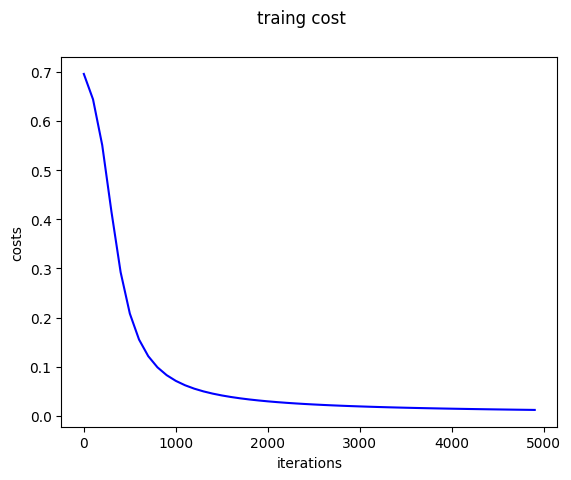

Train cost: 0.011662758280694577
Train accuracy: 99.88945913936044%
Dev cost: 0.011662758280694577
Dev accuracy: 99.88945913936044%


TypeError: Invalid shape (784,) for image data

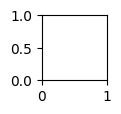

In [3]:
np.random.seed(0)

A, cost = deep.train(X, Y)
accuracy = np.sum(A == Y) / Y.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = deep.evaluate(X, Y)
accuracy = np.sum(A == Y) / Y.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [2]:
np.random.seed(0)
A, cache= deep.forward_prop(X)
cost = deep.cost(Y, A)
print(cost)

0.695875316729886


In [3]:
from deepneuralnetowrk3 import deep

deep1 = deep(X.shape[1], [5, 3, 1])

In [4]:
np.random.seed(0)
A, cache= deep1.forward_prop(X)
cost = deep1.cost(A, Y)
print(cost)

0.695875316729886


In [7]:
A, cost = deep.evaluate(X, Y)
deep1.backward_prop(Y, cache, 0.5)
print(A)
print(deep1.weights)
print(cost)

[[1 1 1 ... 1 1 1]]
{'w1': array([[ 0.0890981 ,  0.02021099,  0.04943373, ...,  0.02632982,
         0.03090699, -0.06775582],
       [ 0.02408701,  0.00749784,  0.02672082, ...,  0.00484894,
        -0.00227857,  0.00399625],
       [ 0.04295829, -0.04238217, -0.05110231, ..., -0.00364861,
         0.01571416, -0.05446546],
       [ 0.05361891, -0.05984585, -0.09117898, ..., -0.03094292,
        -0.01925805, -0.06308145],
       [-0.01667953, -0.04216413,  0.06239623, ..., -0.02024521,
        -0.05159656, -0.02373981]], shape=(5, 784)), 'b1': array([[-12.95267972],
       [ -1.54918288],
       [  1.1697578 ],
       [  1.36719794],
       [  2.9088194 ]]), 'w2': array([[ 0.45863017,  0.5596857 , -1.2243495 , -0.09516994,  0.57668086],
       [-0.16209107,  0.06902422, -0.94605627, -0.30329237,  1.15722237],
       [-0.49595079, -0.91068361,  0.09382171,  0.49949104,  0.7564817 ]]), 'b2': array([[-7.01789486],
       [ 4.10170393],
       [ 9.12328605]]), 'w3': array([[-0.41260416,  

In [9]:
A, cost = deep.evaluate(X, Y)
deep.gradient_descent(Y, cache, 0.5)
print(deep.weights)
print(A)
print(cost)

{'w1': array([[ 0.0890981 ,  0.02021099,  0.04943373, ...,  0.02632982,
         0.03090699, -0.06775582],
       [ 0.02408701,  0.00749784,  0.02672082, ...,  0.00484894,
        -0.00227857,  0.00399625],
       [ 0.04295829, -0.04238217, -0.05110231, ..., -0.00364861,
         0.01571416, -0.05446546],
       [ 0.05361891, -0.05984585, -0.09117898, ..., -0.03094292,
        -0.01925805, -0.06308145],
       [-0.01667953, -0.04216413,  0.06239623, ..., -0.02024521,
        -0.05159656, -0.02373981]], shape=(5, 784)), 'b1': array([[-1.02271455e-03],
       [-1.22320006e-04],
       [ 9.23614526e-05],
       [ 1.07950883e-04],
       [ 2.29673857e-04]]), 'w2': array([[ 0.45863017,  0.5596857 , -1.2243495 , -0.09516994,  0.57668086],
       [-0.16209107,  0.06902422, -0.94605627, -0.30329237,  1.15722237],
       [-0.49595079, -0.91068361,  0.09382171,  0.49949104,  0.7564817 ]]), 'b2': array([[-0.00055412],
       [ 0.00032386],
       [ 0.00072035]]), 'w3': array([[-0.41260416,  0.188

In [6]:
np.random.seed(0)
deep._DeepNeuralNetwork__weights['b1'] = np.ones((5, 1))
deep._DeepNeuralNetwork__weights['b2'] = np.ones((3, 1))
deep._DeepNeuralNetwork__weights['b3'] = np.ones((1, 1))
A, cache = deep.forward_prop(X)
print(A)
print(cache)
print(cache is deep.cache)
print(A is cache['A3'])

[[0.75604168 0.75159401 0.75526974 ... 0.75228471 0.75523153 0.75216211]]
{'A0': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(784, 12665)), 'A1': array([[0.46674157, 0.6416968 , 0.55194982, ..., 0.61669683, 0.56341418,
        0.72750108],
       [0.79463911, 0.87180667, 0.72850105, ..., 0.89023806, 0.79488985,
        0.82287602],
       [0.72334299, 0.68219379, 0.63486078, ..., 0.70351267, 0.77721892,
        0.69450535],
       [0.65273075, 0.69816669, 0.58584419, ..., 0.73952997, 0.51964482,
        0.73152154],
       [0.67385251, 0.69610393, 0.73084267, ..., 0.70653342, 0.76215829,
        0.72703851]], shape=(5, 12665)), 'A2': array([[0.75059323, 0.78323397, 0.77758955, ..., 0.77892495, 0.75843115,
        0.78522894],
       [0.70592135, 0.71162536, 0.73635606, ..., 0.708473  , 